# In class exercises for ML tutorials

## Read in data from eeg study
* This time I've kept in data across a 1s window from many electrodes (20) sampled at 250Hz, so now we have a [960, 20, 250] matrix that contains data from all 960 trials, 20 electrodes, and over a 1s window following stimulus onset
* Also read in a "cond_labels" vector that has 960 0's and 1's to mark trials from the two experimental conditions 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Support vector classifier
from sklearn.svm import SVC 

# also define the default font we'll use for figures. 
fig_font = {'fontname':'Arial', 'size':'20'}

In [2]:
# load the data...
eeg = np.load('class_demo_eeg.npz')

# get the different arrays like this...
eeg['data']
eeg['sr']
eeg['tx']
eeg['cond_labels']

# shape of data
print('Shape of the big eeg data set: ', eeg['data'].shape)

# and if you want to save some typing, especially because we only have a few variables, you reassign the different arrays like this
data = eeg['data']
sr = eeg['sr']
tx = eeg['tx']
cond_labels = eeg['cond_labels']


Shape of the big eeg data set:  (960, 20, 250)


## Compute the mean across the first dimension (trials) and then plot the mean response across time in each of the 20 electrodes on one axis

* Might need to transpose the data into a Time x Electrode format

(20, 250)


//anaconda/lib/python3.5/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


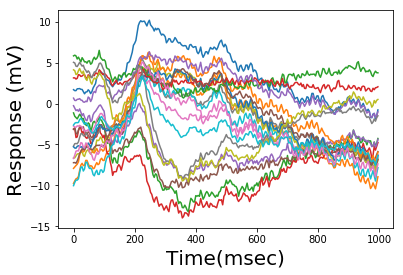

In [3]:
# get the mean over the first dim
mean_data = np.mean(data, axis=0)
print(mean_data.shape)

# plot
plt.plot(tx, mean_data.T)
plt.xlabel('Time(msec)', **fig_font)
plt.ylabel('Response (mV)', **fig_font)
plt.show()

## That gives you an idea about what the pattern of data looks like across electrodes. 
* Next, take the mean across time, so you have a 960 x 20 matrix 
* Use the cond_labels vector to sort the data based on condition (so you have two 480 x 20 matrices)
* Do classification to see if you can decode the experimental condition
* Remember - break up your data into independent training and testing sets
* Set C to a small number if this is taking a long time...

In [4]:
# mean of 3rd dim (time)
all_data = np.mean(data, axis=2)

# sort data into two conditions
data0 = all_data[cond_labels==0,:]
data1 = all_data[cond_labels==1,:]

# define how much training data to use
pcnt_trn = .9
num_train_per_cond = int(np.floor(pcnt_trn * data0.shape[0]))

# then separate out training and test data
trn_data = np.vstack( (data0[:num_train_per_cond,:], data1[:num_train_per_cond,:])  )
trn_labels = np.hstack((np.zeros(num_train_per_cond), np.ones(num_train_per_cond)))

# then assign the test set and test set labels
tst_data = np.vstack( (data0[num_train_per_cond:,:], data1[num_train_per_cond:,:])  )
num_tst_per_cond = int(tst_data.shape[0]/2)
tst_labels = np.hstack((np.zeros(num_tst_per_cond), np.ones(num_tst_per_cond)))

# SVC 
model = SVC(kernel='linear', C=1)

# then fit the model to our training data by passing in the data matrix + a list of labels that denotes the 
# experimental condition for each trial
model.fit(trn_data, trn_labels)

# then predict
class_labels = model.predict(tst_data)

# Then just compute our classification accuracy by comparing the predicted labels to the ground truth
class_acc = np.sum(class_labels==tst_labels) /  tst_data.shape[0]
print('Classification accuracy with a SVM is: ', class_acc)

Classification accuracy with a SVM is:  0.552083333333


## Now try doing this across timepoints!
* First do a time window based on where you think there is nice separation in the responses across electrodes (look at the data that you plotted above)...maybe try 300-400msec post stim
* Then you can try timepoint x timepoint or a moving window

In [5]:
# loop over time
# for t in np.arange(data.shape[2]):
    
    
# or, just for a demo, pick out a temporal window over which to average
t_win = (tx>=300) & (tx<400)

# mean of 3rd dim (time)
all_data = np.mean(data[:,:,t_win], axis=2)

# sort data into two conditions
data0 = all_data[cond_labels==0,:]
data1 = all_data[cond_labels==1,:]

# define how much training data to use
pcnt_trn = .9
num_train_per_cond = int(np.floor(pcnt_trn * data0.shape[0]))

# then separate out training and test data
trn_data = np.vstack( (data0[:num_train_per_cond,:], data1[:num_train_per_cond,:])  )
trn_labels = np.hstack((np.zeros(num_train_per_cond), np.ones(num_train_per_cond)))

# then assign the test set and test set labels
tst_data = np.vstack( (data0[num_train_per_cond:,:], data1[num_train_per_cond:,:])  )
num_tst_per_cond = int(tst_data.shape[0]/2)
tst_labels = np.hstack((np.zeros(num_tst_per_cond), np.ones(num_tst_per_cond)))

# SVC 
model = SVC(kernel='linear', C=1)

# then fit the model to our training data by passing in the data matrix + a list of labels that denotes the 
# experimental condition for each trial
model.fit(trn_data, trn_labels)

# then predict
class_labels = model.predict(tst_data)

# Then just compute our classification accuracy by comparing the predicted labels to the ground truth
class_acc = np.sum(class_labels==tst_labels) /  tst_data.shape[0]
print('Classification accuracy with a SVM is: ', class_acc)

Classification accuracy with a SVM is:  0.677083333333
